In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
path='drive/My Drive/Colab Notebooks/data.xls'

df = pd.read_excel(path)
df

Mounted at /content/drive


,State Name,Urban Agglomerations / Cities,Total - Persons,Total - Males,Total - Females,Religious communities - Hindu - Persons,Religious communities - Hindu - Males,Religious communities - Hindu - Females,Religious communities - Muslims - Persons,Religious communities - Muslims - Males,...,Religious communities - Buddhists - Females,Religious communities - Jains - Persons,Religious communities - Jains - Males,Religious communities - Jains - Females,Religious communities - Other religions and persuasions - Persons,Religious communities - Other religions and persuasions - Males,Religious communities - Other religions and persuasions - Females,Religious communities - Religion not stated - Persons,Religious communities - Religion not stated - Males,Religious communities - Religion not stated - Females
0,JAMMU & KASHMIR,"Srinagar UA (Distt 03,04,& 05)",988210,537512,450698,45681,40219,5462,927104,487268,...,109,272,159,113,9,6,3,45,29,16
1,JAMMU & KASHMIR,Srinagar (MC),898440,484627,413813,32325,28816,3509,853294,447750,...,96,263,152,111,7,4,3,43,27,16
2,JAMMU & KASHMIR,Jammu UA,612163,334452,277711,505867,276125,229742,40218,22665,...,231,1698,884,814,43,18,25,43,32,11
3,JAMMU & KASHMIR,Jammu (MC),369959,198956,171003,315791,169453,146338,18639,10706,...,156,1479,763,716,25,9,16,20,16,4


In [4]:
df.dropna(inplace =True)
df

,State Name,Urban Agglomerations / Cities,Total - Persons,Total - Males,Total - Females,Religious communities - Hindu - Persons,Religious communities - Hindu - Males,Religious communities - Hindu - Females,Religious communities - Muslims - Persons,Religious communities - Muslims - Males,...,Religious communities - Buddhists - Females,Religious communities - Jains - Persons,Religious communities - Jains - Males,Religious communities - Jains - Females,Religious communities - Other religions and persuasions - Persons,Religious communities - Other religions and persuasions - Males,Religious communities - Other religions and persuasions - Females,Religious communities - Religion not stated - Persons,Religious communities - Religion not stated - Males,Religious communities - Religion not stated - Females
0,JAMMU & KASHMIR,"Srinagar UA (Distt 03,04,& 05)",988210,537512,450698,45681,40219,5462,927104,487268,...,109,272,159,113,9,6,3,45,29,16
1,JAMMU & KASHMIR,Srinagar (MC),898440,484627,413813,32325,28816,3509,853294,447750,...,96,263,152,111,7,4,3,43,27,16
2,JAMMU & KASHMIR,Jammu UA,612163,334452,277711,505867,276125,229742,40218,22665,...,231,1698,884,814,43,18,25,43,32,11
3,JAMMU & KASHMIR,Jammu (MC),369959,198956,171003,315791,169453,146338,18639,10706,...,156,1479,763,716,25,9,16,20,16,4


In [5]:
df.columns =['State','City','Population','Male','Female','Hindu(T)','Hindu(M)','Hindu(F)','Muslim(T)','Muslim(M)','Muslim(F)','Christians(T)','Christians(M)','Christians(F)','Sikhs(T)','Sikhs(M)','Sikhs(F)','Buddhist(T)','Buddhist(M)','Buddhist(F)','Jains(T)','Jains(M)','Jains(F)','Other(T)','Other(M)','Other(F)','Not Stated(T)','Not Stated(M)','Not Stated(F)']

In [ ]:
df

,State,City,Population,Male,Female,Hindu(T),Hindu(M),Hindu(F),Muslim(T),Muslim(M),...,Buddhist(F),Jains(T),Jains(M),Jains(F),Other(T),Other(M),Other(F),Not Stated(T),Not Stated(M),Not Stated(F)
0,JAMMU & KASHMIR,"Srinagar UA (Distt 03,04,& 05)",988210,537512,450698,45681,40219,5462,927104,487268,...,109,272,159,113,9,6,3,45,29,16
1,JAMMU & KASHMIR,Srinagar (MC),898440,484627,413813,32325,28816,3509,853294,447750,...,96,263,152,111,7,4,3,43,27,16
2,JAMMU & KASHMIR,Jammu UA,612163,334452,277711,505867,276125,229742,40218,22665,...,231,1698,884,814,43,18,25,43,32,11
3,JAMMU & KASHMIR,Jammu (MC),369959,198956,171003,315791,169453,146338,18639,10706,...,156,1479,763,716,25,9,16,20,16,4


([<matplotlib.axis.XTick at 0x7fb83636ccd0>,
 [Text(0.25, 0, 'Srinagar UA (Distt 03,04,& 05)'),
  Text(1.25, 0, 'Srinagar (MC)'),
  Text(2.25, 0, 'Jammu UA '),
  Text(3.25, 0, 'Jammu  (MC)')])

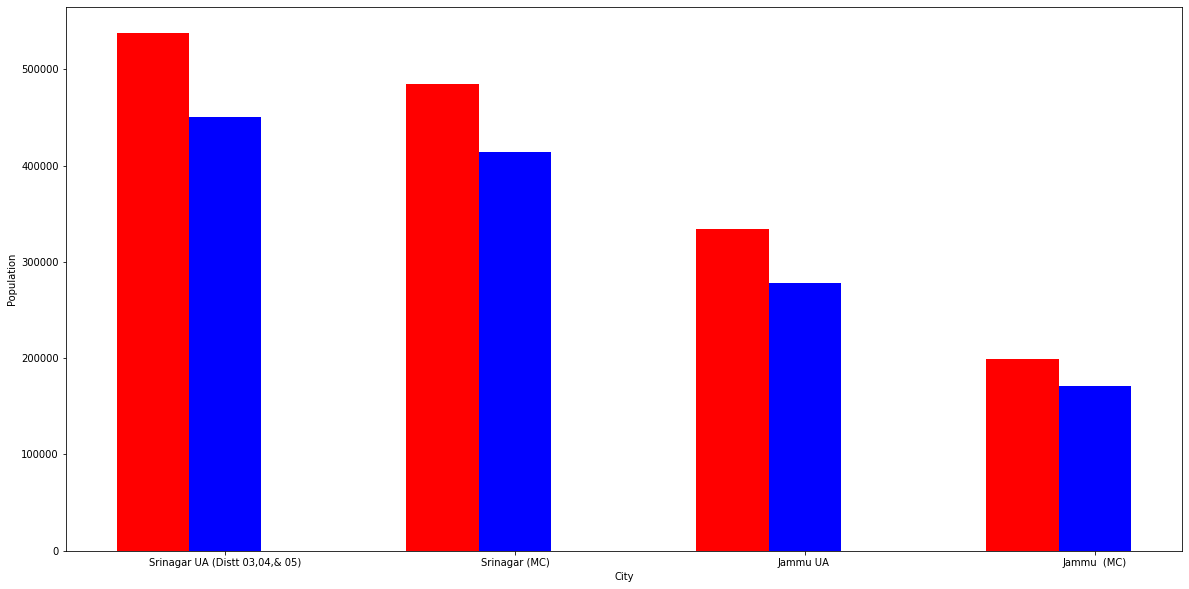

In [6]:

plt.figure(figsize=(20,10))
ind = np.arange(4)
data = df['Male']
data1 = df['Female']
width = 0.25
bar1 = plt.bar(ind, data, width, color = 'r')
bar1 = plt.bar(ind+width, data1, width, color = 'b')
plt.xlabel('City')
plt.ylabel('Population')
plt.xticks(ind + width, df['City'])

([<matplotlib.axis.XTick at 0x7fc9e318f8b0>,
 [Text(0.1, 0, 'Srinagar UA (Distt 03,04,& 05)'),
  Text(1.1, 0, 'Srinagar (MC)'),
  Text(2.1, 0, 'Jammu UA '),
  Text(3.1, 0, 'Jammu  (MC)')])

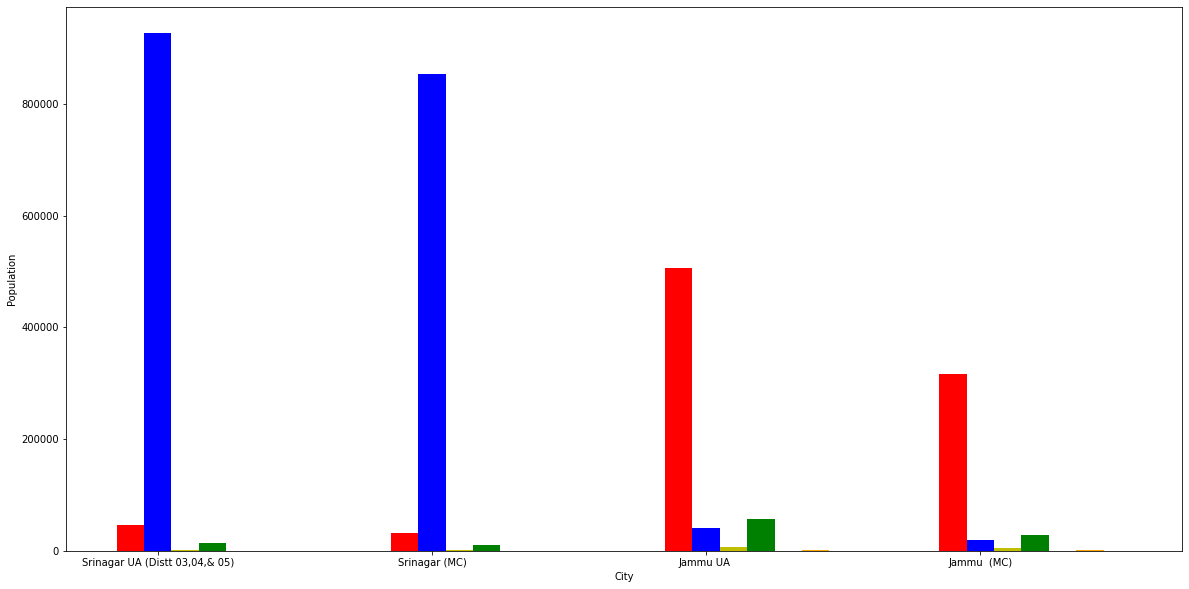

In [6]:
plt.figure(figsize=(20,10))
ind = np.arange(4)
data = df['Hindu(T)']
data1 = df['Muslim(T)']
data2 = df['Christians(T)']
data3 = df['Sikhs(T)']
data4 = df['Jains(T)']
data5 = df['Not Stated(T)']
width = 0.1
bar1 = plt.bar(ind, data, width, color = 'r')
bar1 = plt.bar(ind+width, data1, width, color = 'b')
bar1 = plt.bar(ind+(2*width), data2, width, color = 'y')
bar1 = plt.bar(ind+(3*width), data3, width, color = 'g')
bar1 = plt.bar(ind+(5*width), data4, width, color = 'orange')
bar1 = plt.bar(ind+(6*width), data5, width, color = 'pink')
plt.xlabel('City')
plt.ylabel('Population')
plt.xticks(ind + width, df['City'])

([<matplotlib.axis.XTick at 0x7fc9e3008a00>,
 [Text(0.1, 0, 'Srinagar UA (Distt 03,04,& 05)'),
  Text(1.1, 0, 'Srinagar (MC)'),
  Text(2.1, 0, 'Jammu UA '),
  Text(3.1, 0, 'Jammu  (MC)')])

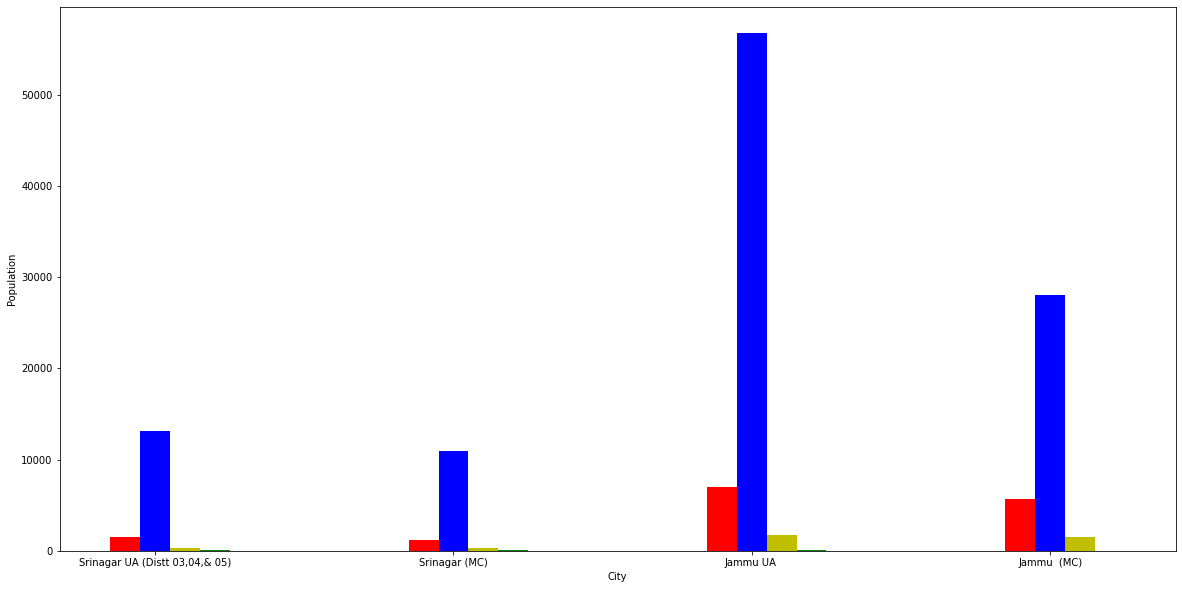

In [7]:
plt.figure(figsize=(20,10))
ind = np.arange(4)
data = df['Hindu(T)']
data1 = df['Muslim(T)']
data2 = df['Christians(T)']
data3 = df['Sikhs(T)']
data4 = df['Jains(T)']
data5 = df['Not Stated(T)']
width = 0.1
bar1 = plt.bar(ind, data2, width, color = 'r')
bar1 = plt.bar(ind+width, data3, width, color = 'b')
bar1 = plt.bar(ind+(2*width), data4, width, color = 'y')
bar1 = plt.bar(ind+(3*width), data5, width, color = 'g')

plt.xlabel('City')
plt.ylabel('Population')
plt.xticks(ind + width, df['City'])

([<matplotlib.axis.XTick at 0x7fc9e2f839a0>,
 [Text(0.1, 0, 'Srinagar UA (Distt 03,04,& 05)'),
  Text(1.1, 0, 'Srinagar (MC)'),
  Text(2.1, 0, 'Jammu UA '),
  Text(3.1, 0, 'Jammu  (MC)')])

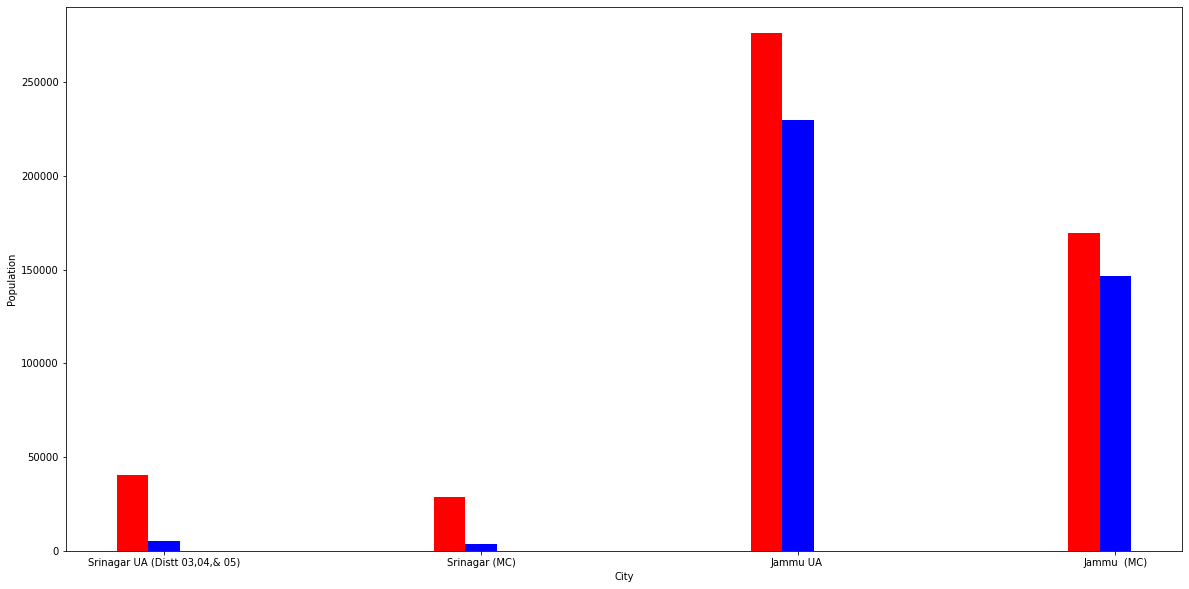

In [8]:
plt.figure(figsize=(20,10))
ind = np.arange(4)
data = df['Hindu(M)']
data1 = df['Hindu(F)']

width = 0.1
bar1 = plt.bar(ind, data, width, color = 'r')
bar1 = plt.bar(ind+width, data1, width, color = 'b')


plt.xlabel('City')
plt.ylabel('Population')
plt.xticks(ind + width, df['City'])

([<matplotlib.axis.XTick at 0x7fc9e2f6adc0>,
 [Text(0.1, 0, 'Srinagar UA (Distt 03,04,& 05)'),
  Text(1.1, 0, 'Srinagar (MC)'),
  Text(2.1, 0, 'Jammu UA '),
  Text(3.1, 0, 'Jammu  (MC)')])

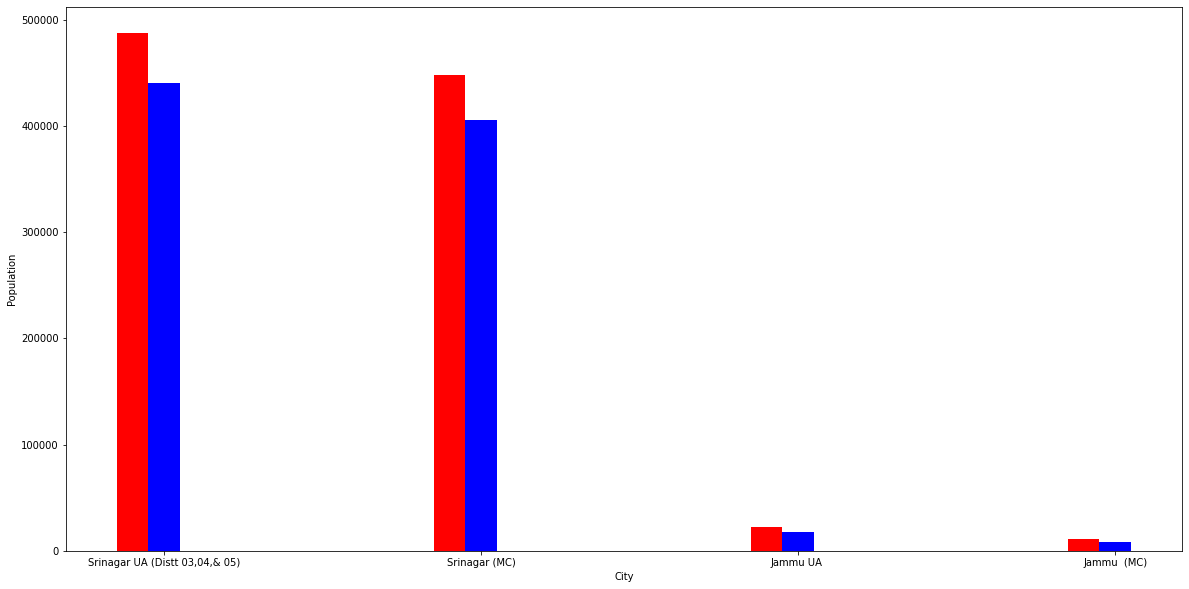

In [9]:
plt.figure(figsize=(20,10))
ind = np.arange(4)
data = df['Muslim(M)']
data1 = df['Muslim(F)']

width = 0.1
bar1 = plt.bar(ind, data, width, color = 'r')
bar1 = plt.bar(ind+width, data1, width, color = 'b')


plt.xlabel('City')
plt.ylabel('Population')
plt.xticks(ind + width, df['City'])

([<matplotlib.axis.XTick at 0x7fc9e2ed3430>,
 [Text(0.1, 0, 'Srinagar UA (Distt 03,04,& 05)'),
  Text(1.1, 0, 'Srinagar (MC)'),
  Text(2.1, 0, 'Jammu UA '),
  Text(3.1, 0, 'Jammu  (MC)')])

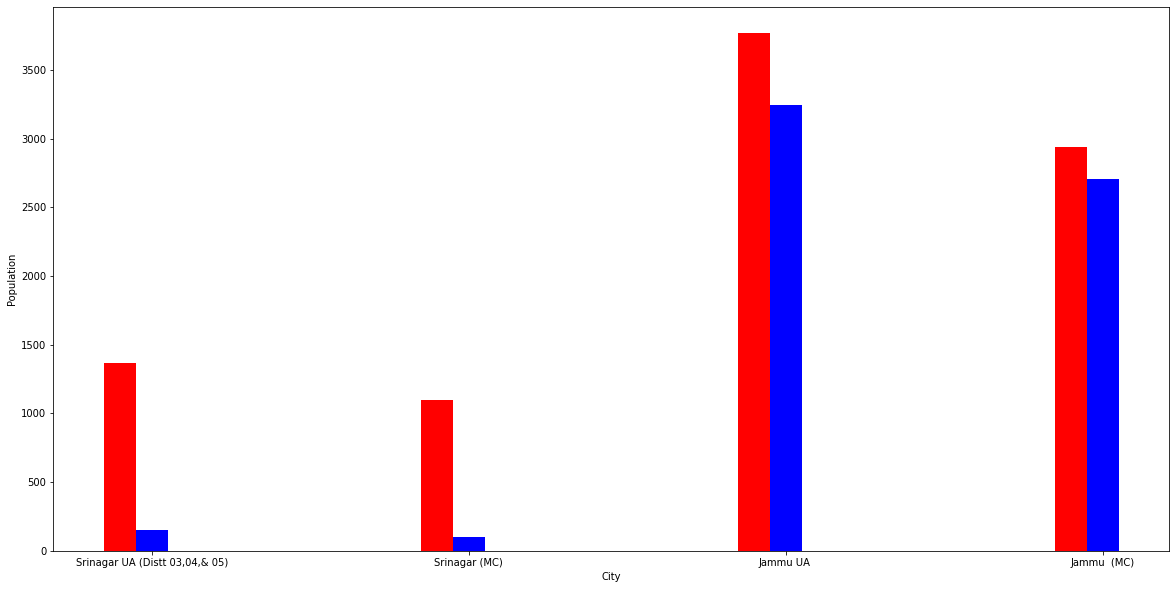

In [10]:
plt.figure(figsize=(20,10))
ind = np.arange(4)
data = df['Christians(M)']
data1 = df['Christians(F)']

width = 0.1
bar1 = plt.bar(ind, data, width, color = 'r')
bar1 = plt.bar(ind+width, data1, width, color = 'b')


plt.xlabel('City')
plt.ylabel('Population')
plt.xticks(ind + width, df['City'])

([<matplotlib.axis.XTick at 0x7fc9e2e415e0>,
 [Text(0.1, 0, 'Srinagar UA (Distt 03,04,& 05)'),
  Text(1.1, 0, 'Srinagar (MC)'),
  Text(2.1, 0, 'Jammu UA '),
  Text(3.1, 0, 'Jammu  (MC)')])

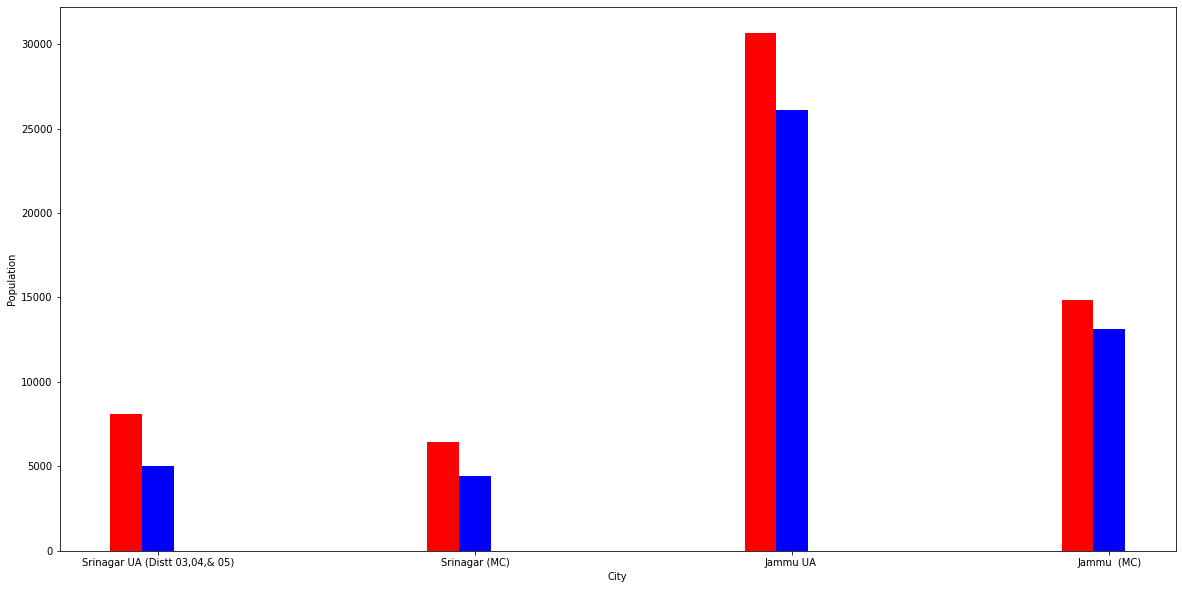

In [11]:
plt.figure(figsize=(20,10))
ind = np.arange(4)
data = df['Sikhs(M)']
data1 = df['Sikhs(F)']

width = 0.1
bar1 = plt.bar(ind, data, width, color = 'r')
bar1 = plt.bar(ind+width, data1, width, color = 'b')


plt.xlabel('City')
plt.ylabel('Population')
plt.xticks(ind + width, df['City'])

([<matplotlib.axis.XTick at 0x7fc9e2e2e430>,
 [Text(0.1, 0, 'Srinagar UA (Distt 03,04,& 05)'),
  Text(1.1, 0, 'Srinagar (MC)'),
  Text(2.1, 0, 'Jammu UA '),
  Text(3.1, 0, 'Jammu  (MC)')])

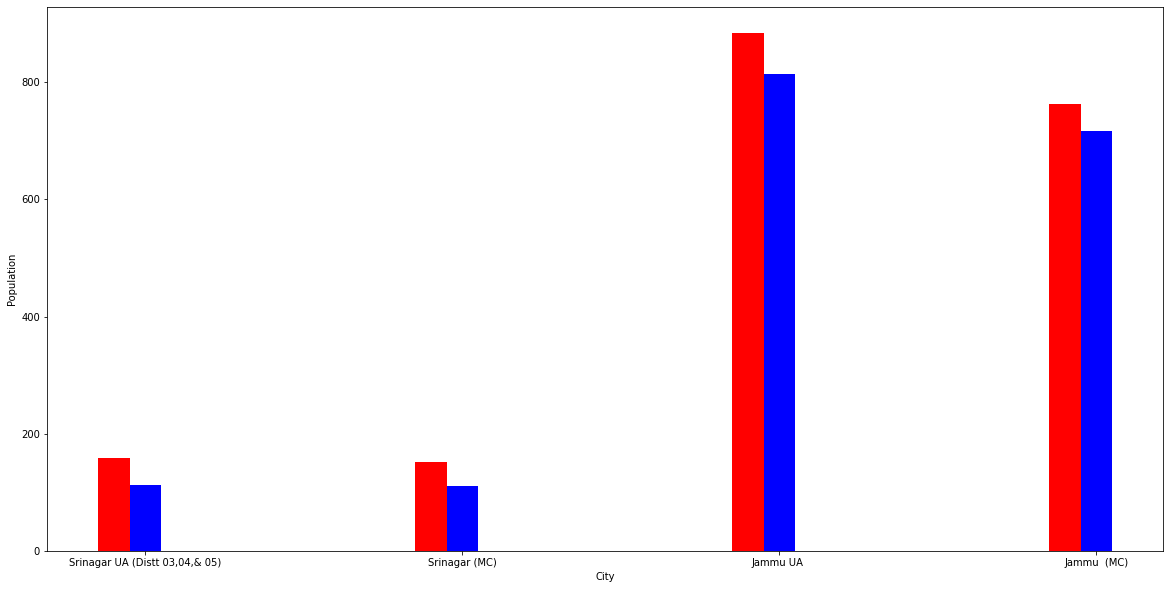

In [12]:
plt.figure(figsize=(20,10))
ind = np.arange(4)
data = df['Jains(M)']
data1 = df['Jains(F)']

width = 0.1
bar1 = plt.bar(ind, data, width, color = 'r')
bar1 = plt.bar(ind+width, data1, width, color = 'b')


plt.xlabel('City')
plt.ylabel('Population')
plt.xticks(ind + width, df['City'])

([<matplotlib.axis.XTick at 0x7fc9e2daad90>,
 [Text(0.05, 0, 'Srinagar UA (Distt 03,04,& 05)'),
  Text(1.05, 0, 'Srinagar (MC)'),
  Text(2.05, 0, 'Jammu UA '),
  Text(3.05, 0, 'Jammu  (MC)')])

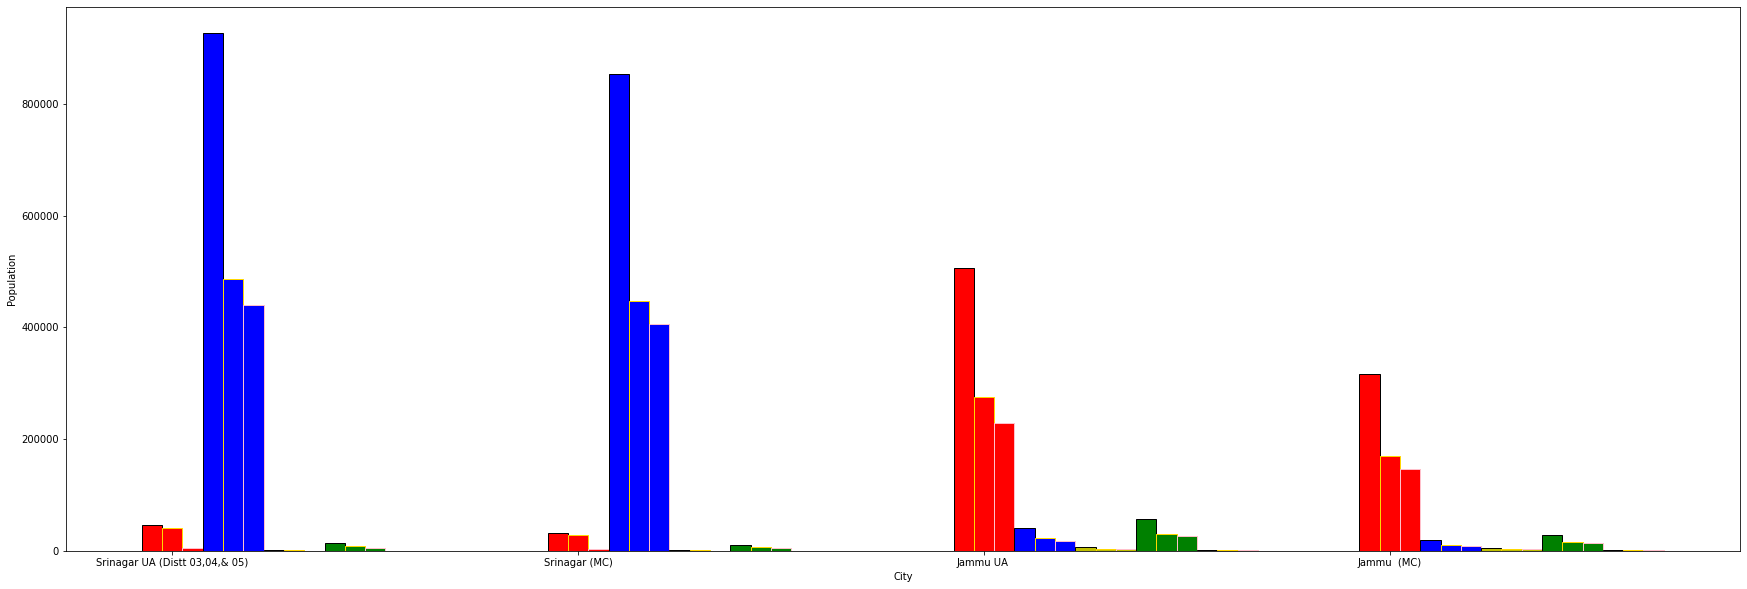

In [13]:
plt.figure(figsize=(30,10))
ind = np.arange(4)
data = df['Hindu(T)']
datam = df['Hindu(M)']
dataf = df['Hindu(F)']
data1 = df['Muslim(T)']
data1m = df['Muslim(M)']
data1f = df['Muslim(F)']
data2 = df['Christians(T)']
data2m = df['Christians(M)']
data2f = df['Christians(F)']
data3 = df['Sikhs(T)']
data3m = df['Sikhs(M)']
data3f = df['Sikhs(F)']
data4 = df['Jains(T)']
data4m = df['Jains(M)']
data4f = df['Jains(F)']

width = 0.05
bar1 = plt.bar(ind, data, width, color = 'r',edgecolor='black')
bar1 = plt.bar(ind+width, datam, width, color = 'r',edgecolor = 'gold')
bar1 = plt.bar(ind+(2*width), dataf, width, color = 'r',edgecolor = 'pink')
bar1 = plt.bar(ind+(3*width), data1, width, color = 'b',edgecolor='black')
bar1 = plt.bar(ind+(4*width), data1m, width, color = 'b',edgecolor = 'gold')
bar1 = plt.bar(ind+(5*width), data1f, width, color = 'b',edgecolor = 'pink')
bar1 = plt.bar(ind+(6*width), data2, width, color = 'y',edgecolor='black')
bar1 = plt.bar(ind+(7*width), data2m, width, color = 'y',edgecolor = 'gold')
bar1 = plt.bar(ind+(8*width), data2f, width, color = 'y',edgecolor = 'pink')
bar1 = plt.bar(ind+(9*width), data3, width, color = 'g',edgecolor='black')
bar1 = plt.bar(ind+(10*width), data3m, width, color = 'g',edgecolor = 'gold')
bar1 = plt.bar(ind+(11*width), data3f, width, color = 'g',edgecolor = 'pink')
bar1 = plt.bar(ind+(12*width), data4, width, color = 'orange',edgecolor='black')
bar1 = plt.bar(ind+(13*width), data4m, width, color = 'orange',edgecolor = 'gold')
bar1 = plt.bar(ind+(14*width), data4f, width, color = 'orange',edgecolor = 'pink')
plt.xlabel('City')
plt.ylabel('Population')
plt.xticks(ind + width, df['City'])

0    45.607513
1    46.059058
2    45.365532
3    46.222149
dtype: float64


([<matplotlib.axis.XTick at 0x7fc9df3efa60>,
 [Text(0.1, 0, 'Srinagar UA (Distt 03,04,& 05)'),
  Text(1.1, 0, 'Srinagar (MC)'),
  Text(2.1, 0, 'Jammu UA '),
  Text(3.1, 0, 'Jammu  (MC)')])

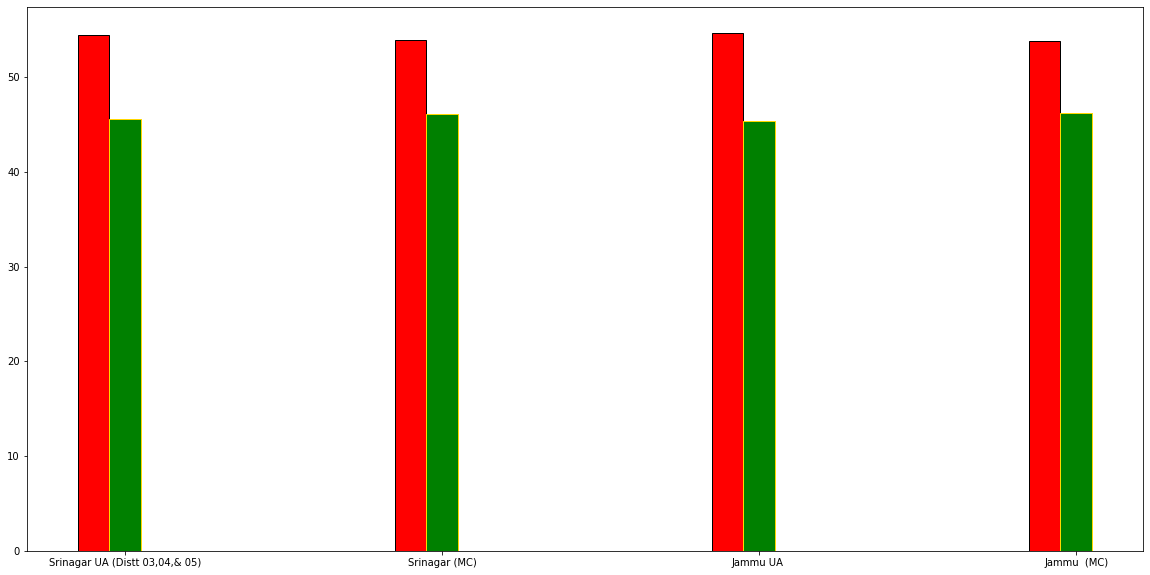

In [30]:
data = df['Male']
data1 = df['Female']
data3 =  (data/df['Population'])*100
data4 = (data1/df['Population'])*100
print(data4)
plt.figure(figsize=(20,10))
ind = np.arange(4)
width = 0.1
bar1 = plt.bar(ind, data3, width, color = 'r',edgecolor='black')
bar1 = plt.bar(ind+width, data4, width, color = 'g',edgecolor = 'gold')
plt.xticks(ind + width, df['City'])

0     1.211898
1     0.847968
2    82.727008
3    85.576276
dtype: float64


0    97.589960
1    98.001754
2     6.320599
3     4.639100
dtype: float64


0    0.034169
1    0.024166
2    1.167401
3    1.580674
dtype: float64




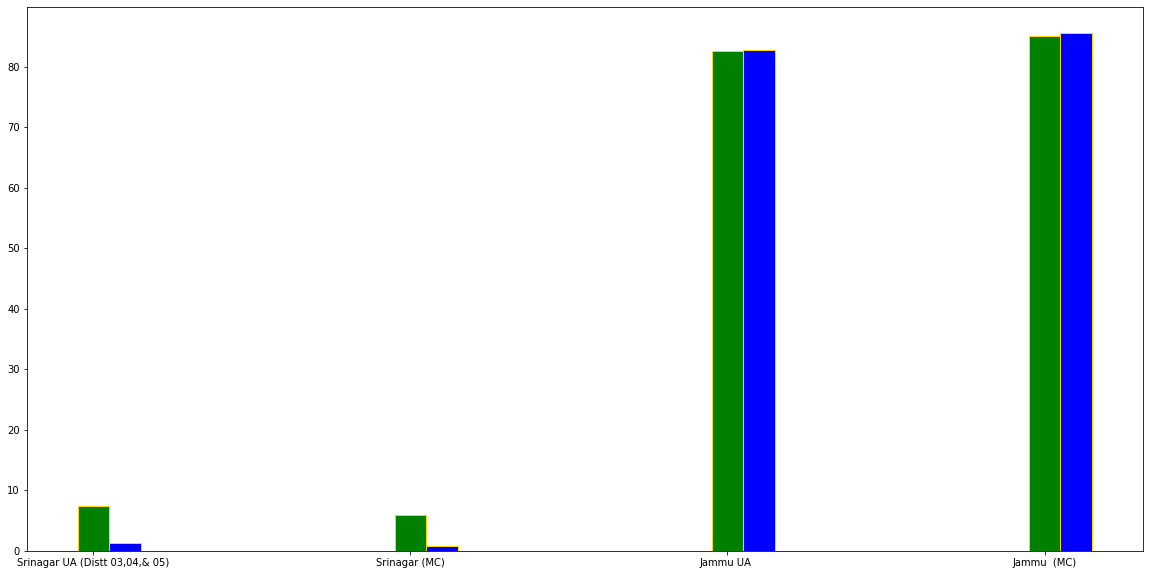

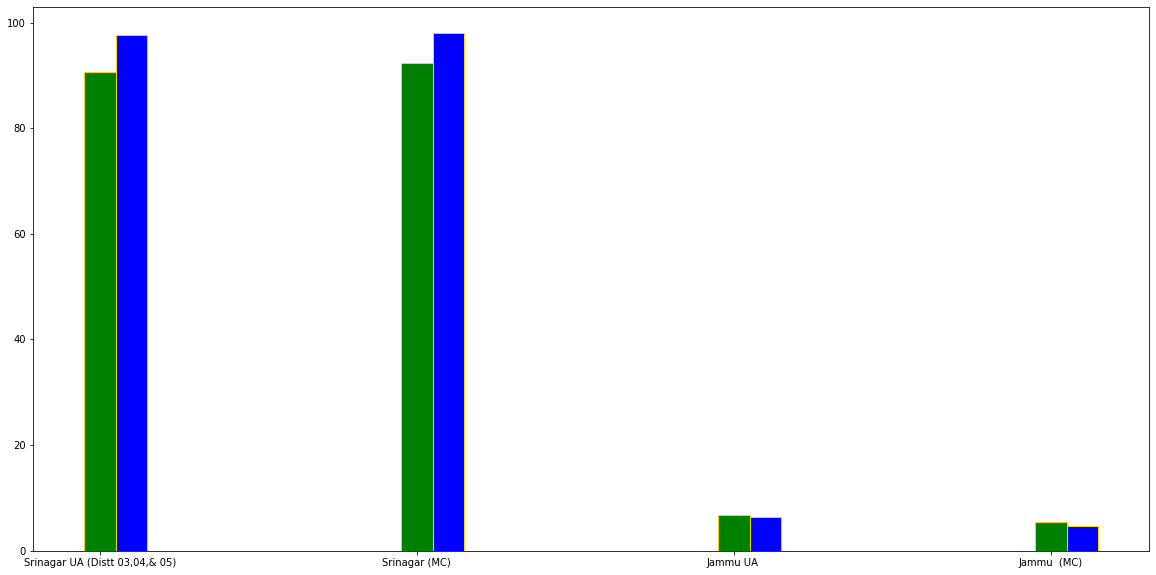

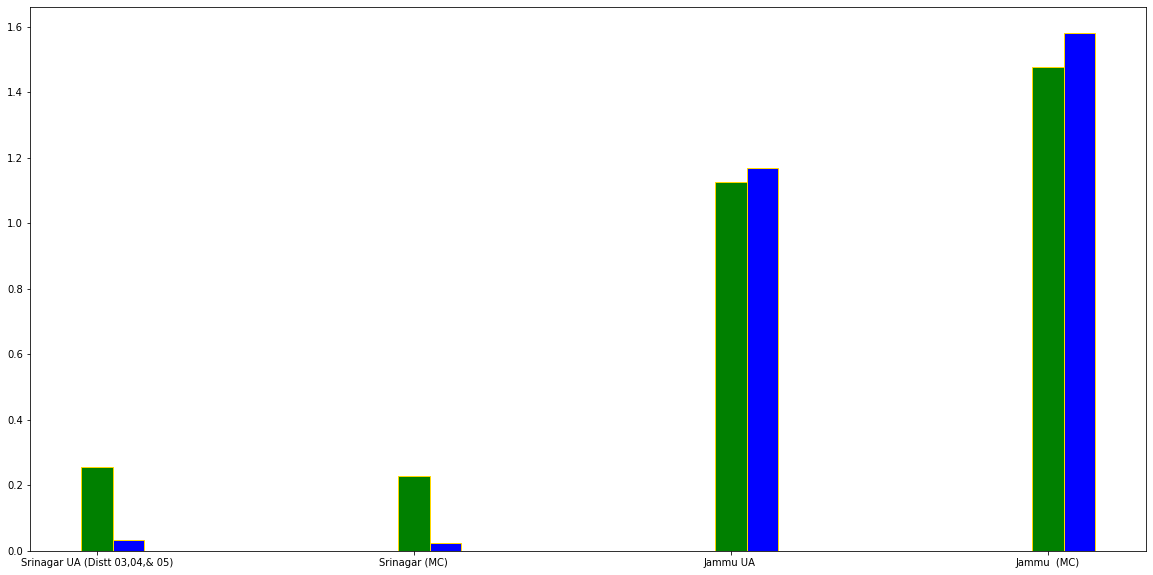

In [32]:
for i in ['Hindu','Muslim','Christians']:
  data = df['{}(M)'.format(i)]
  data1 = df['{}(F)'.format(i)]
  data2 = df['{}(T)'.format(i)]
  data3 =  (data/df['Male'])*100
  data4 = (data1/df['Female'])*100
  
  print(data4)
  plt.figure(figsize=(20,10))
  ind = np.arange(4)
  width = 0.1
 
  bar1 = plt.bar(ind+width, data3, width, color = 'g',edgecolor = 'gold')
  bar1 = plt.bar(ind+(2*width), data4, width, color = 'b',edgecolor = 'gold')
  print()
  print()
  plt.xticks(ind + width, df['City'])

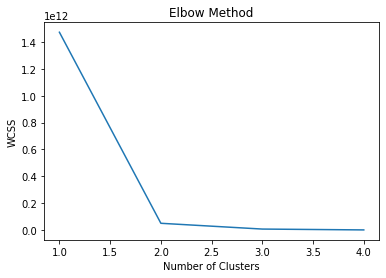

In [36]:

from sklearn.cluster import KMeans


# Load the data into a Pandas DataFrame


# Extract the columns with the religious community data
religions = df.iloc[:, 3:]

# Determine the appropriate number of clusters using the elbow method
wcss = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(religions)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 5), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()



In [69]:
# Perform k-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(religions)

# Add the cluster labels to the original DataFrame
df['Cluster'] = pred_y

# Print the resulting clusters
print(df[['State', 'City', 'Cluster']])


             State                            City  Cluster
0  JAMMU & KASHMIR  Srinagar UA (Distt 03,04,& 05)        0
1  JAMMU & KASHMIR                   Srinagar (MC)        3
2  JAMMU & KASHMIR                       Jammu UA         2
3  JAMMU & KASHMIR                     Jammu  (MC)        1


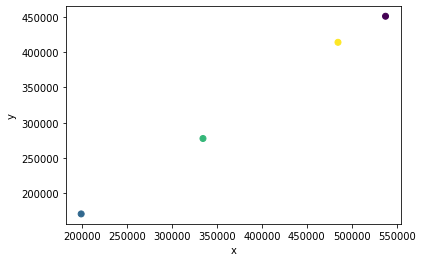

In [44]:
import matplotlib.pyplot as plt

# create a scatter plot
plt.scatter(df['Male'], df['Female'], c=df['Cluster'])

# add axis labels
plt.xlabel('x')
plt.ylabel('y')

# show the plot
plt.show()


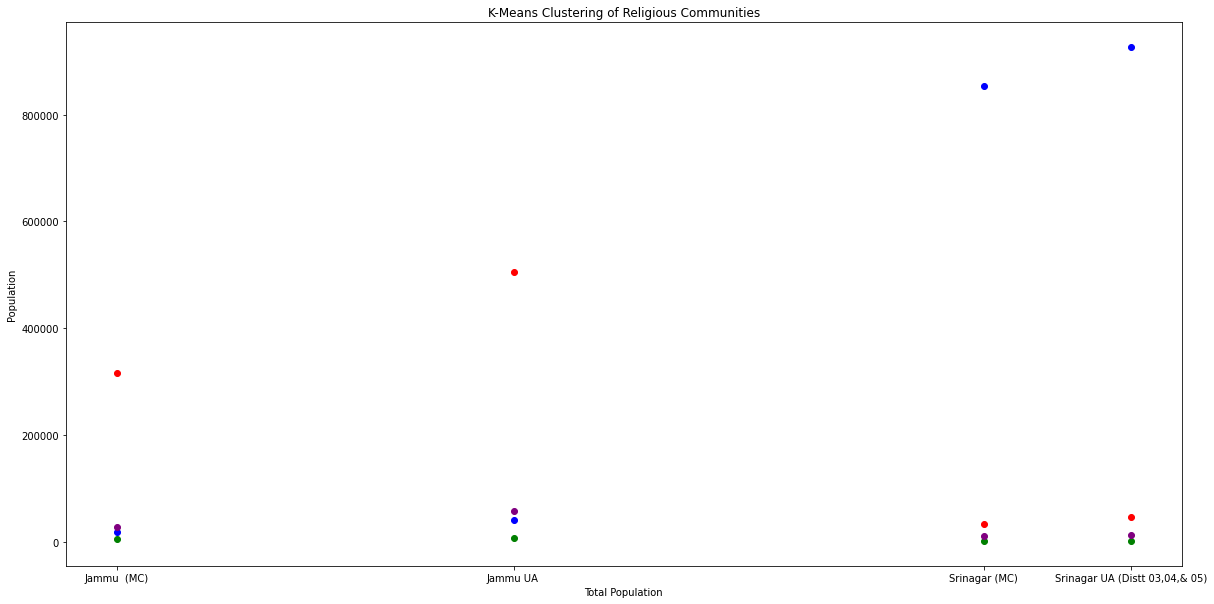

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
# Set the colors for each cluster
colors = ['red', 'blue', 'green', 'purple']

# Create a scatter plot of the data points, with the color for each point corresponding to its cluster label

for i in range(4):
  for j, color in zip(['Hindu(T)','Muslim(T)','Christians(T)'], ['red', 'blue', 'green']):
    plt.scatter(df[df['Cluster'] == i]['Population'], df[df['Cluster'] == i][j], color=color)
  plt.scatter(df[df['Cluster'] == i]['Population'], df[df['Cluster'] == i]['Sikhs(T)'], color='purple')


# Set the axis labels and title
plt.xlabel('Total Population')
plt.ylabel('Population')
legend_handles =['Hindu(T)','Muslim(T)','Christians(T)']
plt.title('K-Means Clustering of Religious Communities')

plt.xticks(df['Population'],df['City'])

# Show the plot
plt.show()


In [13]:
df1 = df.iloc[:,2:]
df1 =df1.transpose()
df1.columns = df['City']
df1

City,"Srinagar UA (Distt 03,04,& 05)",Srinagar (MC),Jammu UA,Jammu (MC)
Population,988210,898440,612163,369959
Male,537512,484627,334452,198956
Female,450698,413813,277711,171003
Hindu(T),45681,32325,505867,315791
Hindu(M),40219,28816,276125,169453
Hindu(F),5462,3509,229742,146338
Muslim(T),927104,853294,40218,18639
Muslim(M),487268,447750,22665,10706
Muslim(F),439836,405544,17553,7933
Christians(T),1524,1201,7010,5644


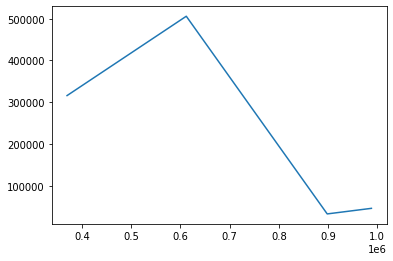

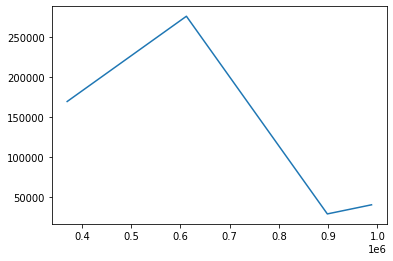

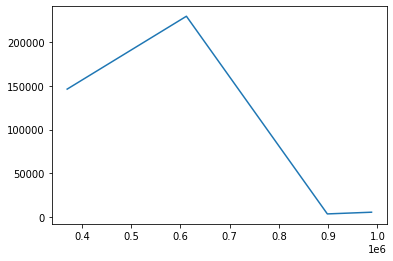

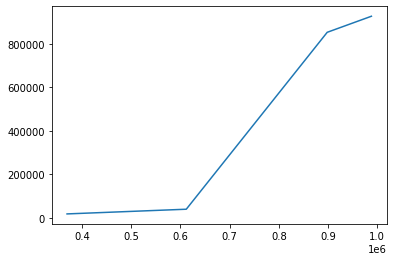

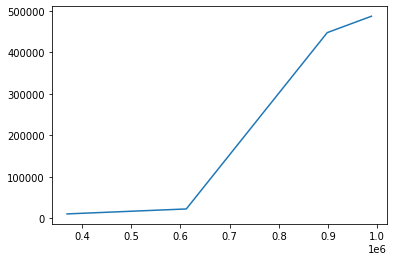

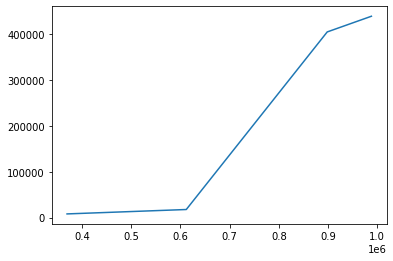

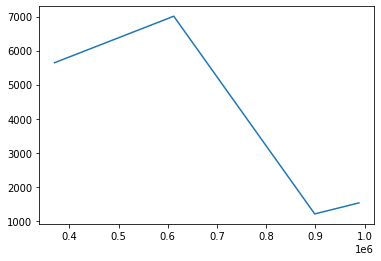

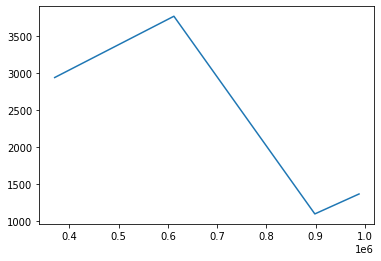

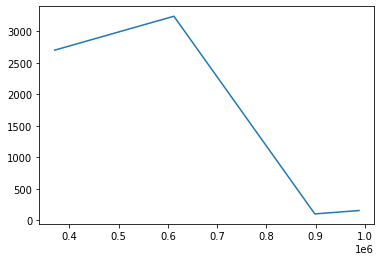

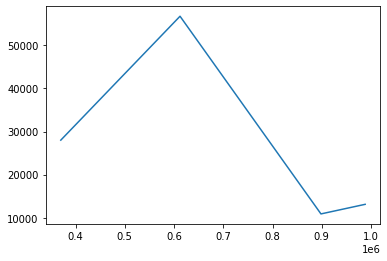

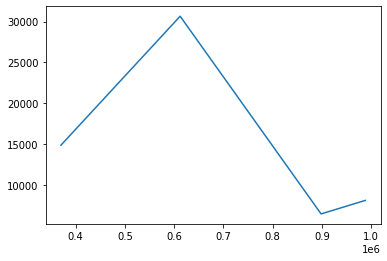

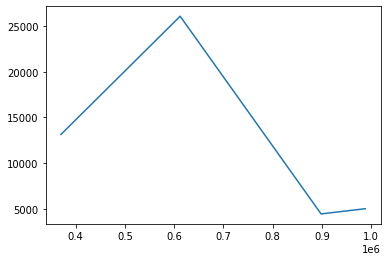

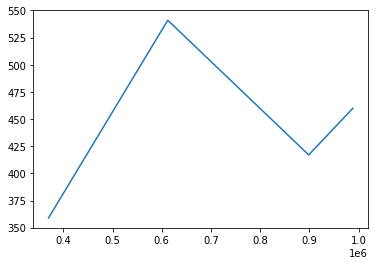

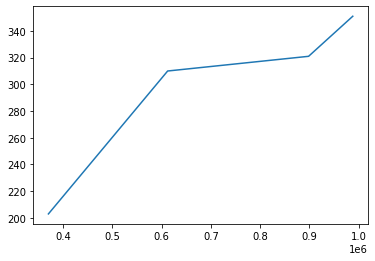

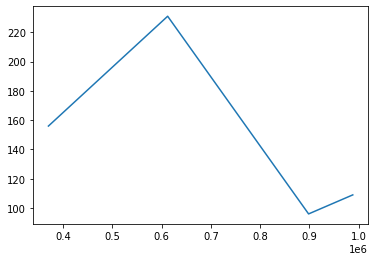

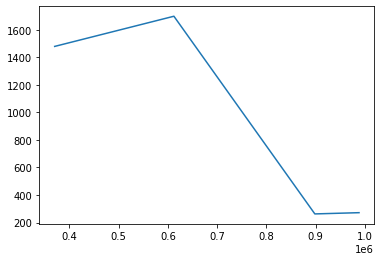

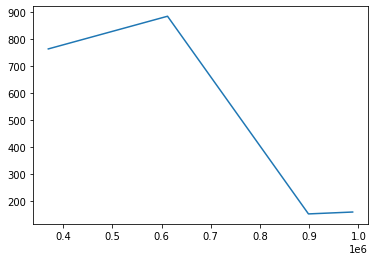

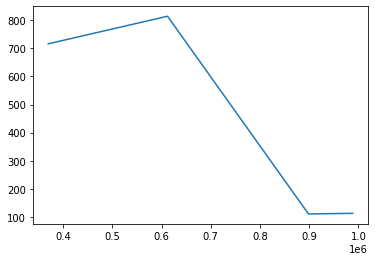

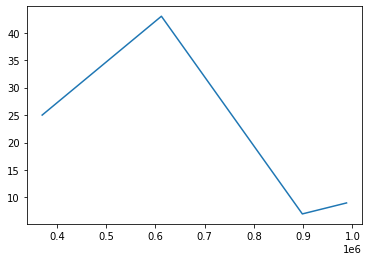

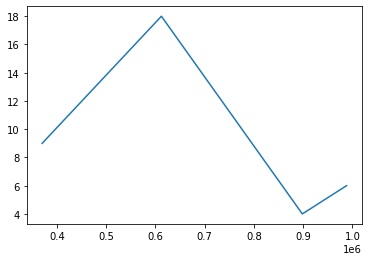

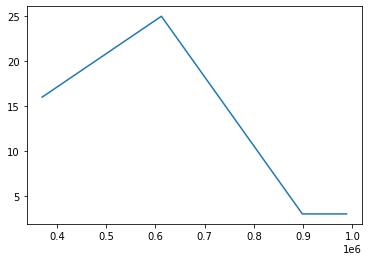

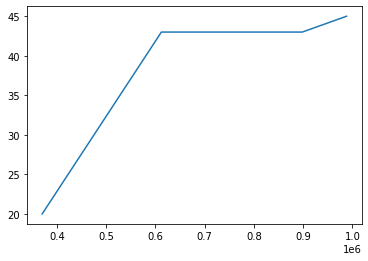

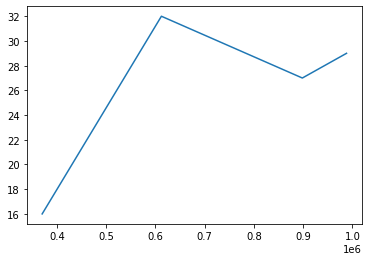

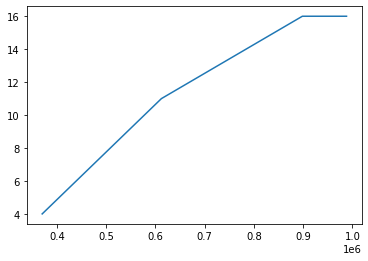

In [107]:
x = df1.iloc[0,:]
for i in range(3,27):
  y = df1.iloc[i,:]
  plt.plot(x,y)
  plt.show()

In [115]:
y = df1.iloc[26,:]
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75)
print(y_test)

City
Srinagar (MC)    16
Name: Not Stated(F), dtype: int64


In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
reg = LinearRegression()
x_train = x_train.to_numpy().reshape(-1,1)
y_train = y_train.to_numpy().reshape(-1,1)
model = reg.fit(x_train,y_train)

In [117]:
try:
  x_test = x_test.to_numpy().reshape(-1,1)
  y_pred = model.predict(x_test)
  print(y_pred)
except AttributeError:
  x_test = x_test.reshape(-1,1)
  y_pred = model.predict(x_test)
  print(y_pred)

[[14.89621166]]


In [81]:
dt = pd.DataFrame()


In [114]:
mean_squared_error(y_test,y_pred)

1.2183487082958167

In [118]:
mean_absolute_error(y_test,y_pred)

1.1037883439753369